## LINEAR REGRESSION USING MULTIPLE VARIABLES

## Overview

#### Hypothesis (h)
Hypothesis is a significant linear relationship between an independent variable X and a dependent variable Y.

x0 is bias value should be 1


   $\begin{align}
    \ {h} = \theta_0*x_0+ \theta_1*x_1+\theta_2*x_2+\theta_3*x_3.... \;\;(For\;Multiple\;Variable)
    \end{align}
   $

#### Cost Functions (mean squared difference)
$\begin{align}
   \ {J(min)} = (1/(2*m))* \sum_{i=1}^m (h_i - y_i )^2
   \end{align}
    $

#### Gradient Descent
Gradient Descent is a general function for minimizing a function, in this case the Mean Squared Error(MSE) cost function.

$\begin{align}
   \ {\theta} = {\theta}-{ \alpha }\frac{\partial j}{\Bigl({\partial \theta}\Bigr)}  
   \end{align}
    $


## Predicting House Prices
Predicting House Prices Using Linear Regression.

##### Environment and tools.
jupyter notebook, numpy, pandas, matplotlib

In [2]:
#Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the Dataset 
data=pd.read_csv('Data_set/house_price_train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Dataset columns
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#Giving short summaries about the sample & measures of the data
data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [50]:
#Display the data type of each of the variable
#data.dtypes 

In [8]:
#Drop() removes rows based on “labels”, rather than numeric indexing.
data1=data.drop(['Id','LotFrontage','SalePrice','MasVnrType','Alley','TotalBsmtSF','BsmtFinSF1','ExterCond','OverallQual','ExterQual','YearRemodAdd','RoofMatl','RoofStyle', 'OverallCond', 'YearBuilt','Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','Foundation','BsmtQual','Heating', 'HeatingQC', 'Condition1','BsmtFinSF2','BsmtUnfSF','BsmtFinType1','BsmtFinType2','BsmtExposure','Condition2','PoolArea','PoolQC','Exterior1st', 'Exterior2nd','Fence','MiscFeature','Utilities','MiscVal','MoSold','YrSold','Neighborhood','LandSlope','GarageCond','PavedDrive','WoodDeckSF','BldgType','Condition2','LotConfig','GarageCars','GarageQual','ScreenPorch','SaleType','3SsnPorch','EnclosedPorch','GarageType','GarageFinish','Functional','FireplaceQu','OpenPorchSF','FullBath','HalfBath','HouseStyle','GarageYrBlt','SaleCondition'], axis = 1) 
print(np.shape(data))

(1460, 81)


In [9]:
#Data Columns
data1.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'MasVnrArea', 'BsmtCond', 'CentralAir', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea'],
      dtype='object')

In [10]:
#Dependent  Variable
y=data['SalePrice']
print(np.shape(y))

(1460,)


In [11]:
#Index.value_counts() function returns object containing counts of unique values.
data1['Street'].value_counts()
print(np.shape(data1))

(1460, 18)


### Categorical Data
Data that is qualitative where the number does not convey any meaning.
There are two types of categorical variable
<ul>
    <li>Nominal</li>
    <li>Ordinal</li>
<ul>

In [12]:
#categorical data
categorical_features = ["Street","LotShape","MSZoning","LandContour","BsmtCond","CentralAir","KitchenQual"]

In [13]:
#Get_dummies is a common way to create dummy variables for categorical features
df = pd.get_dummies(data1, columns=categorical_features)
print(np.shape(df))

(1460, 36)


In [14]:
# Concatenating both Dummy data and Original data 
data_house=pd.concat(([df,y]),axis=1)
print(np.shape(data_house))

(1460, 37)


In [15]:
#Dropna() method allows the user to analyze and drop Rows/Columns with Null values in different ways.
data_house.dropna(subset=['MSSubClass', 'LotArea', 'MasVnrArea', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'Street_Grvl', 'Street_Pave',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po',
       'BsmtCond_TA', 'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'SalePrice'],inplace=True)

In [16]:
print(np.shape(data_house))

(1452, 37)


In [17]:
# Creating arrays
x=np.array(data_house.iloc[:,0:-1])
y=np.array(data_house.iloc[:,[-1]])

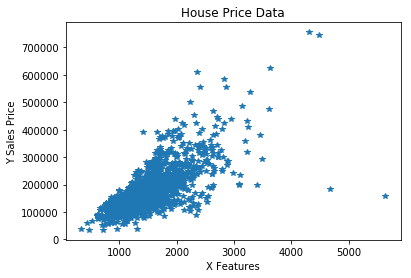

In [18]:
# Ploting X & Y Dataset
plt.figure(1)
plt.title("House Price Data")
plt.xlabel("X Features")
plt.ylabel("Y Sales Price")
plt.plot(x[:,3],y,'*')
plt.show()

In [19]:
# Find the maximum value from the columns ('with the help of MAX')
Max_Value=data_house.iloc[:,0:-1]
Max_Value.max()

MSSubClass             190.0
LotArea             215245.0
MasVnrArea            1600.0
GrLivArea             5642.0
BsmtFullBath             3.0
BsmtHalfBath             2.0
BedroomAbvGr             8.0
KitchenAbvGr             3.0
TotRmsAbvGrd            14.0
Fireplaces               3.0
GarageArea            1418.0
Street_Grvl              1.0
Street_Pave              1.0
LotShape_IR1             1.0
LotShape_IR2             1.0
LotShape_IR3             1.0
LotShape_Reg             1.0
MSZoning_C (all)         1.0
MSZoning_FV              1.0
MSZoning_RH              1.0
MSZoning_RL              1.0
MSZoning_RM              1.0
LandContour_Bnk          1.0
LandContour_HLS          1.0
LandContour_Low          1.0
LandContour_Lvl          1.0
BsmtCond_Fa              1.0
BsmtCond_Gd              1.0
BsmtCond_Po              1.0
BsmtCond_TA              1.0
CentralAir_N             1.0
CentralAir_Y             1.0
KitchenQual_Ex           1.0
KitchenQual_Fa           1.0
KitchenQual_Gd

In [20]:
print(np.shape(data_house))

(1452, 37)


In [21]:
# Drop the row which consist of the above maximum value
X3=data_house[data_house['LotArea']==215245].index
data_house.drop(X3,inplace=True)
print(np.shape(data_house))

(1451, 37)


In [22]:
x=np.array(data_house.iloc[:,0:-1])
y=np.array(data_house.iloc[:,[-1]])

### Train & Test Dataset

The training data is used to make sure the machine recognizes patterns in the data and the test data is used to see how well the machine can predict new answers based on its training.

In [23]:
#split function using randomization
def split_data(x,y,test_per):
    m=len(x)
    random_data=np.random.randint(0,m,m)
    #Number Of train set & test set 
    num_train_set = int((1-test_per)*m)
    num_test_set  = int(test_per*m)
    train_ind=random_data[0:num_train_set]
    #creating a array of zeros for the train dataset
    x_train=np.zeros((len(train_ind),1))
    y_train=np.zeros((len(train_ind),1))
    # x_train & y_train after the split 
    x_train = x[train_ind]
    y_train = y[train_ind]
    
    num_test_set=random_data[num_train_set::]
    #creating a array of zeros for the test dataset
    x_test=np.zeros((len(num_test_set),1))
    y_test=np.zeros((len(num_test_set),1))
    #x_test & y_test after the split
    x_test = x[num_test_set]
    y_test = y[num_test_set]
    return x_train,y_train,x_test,y_test

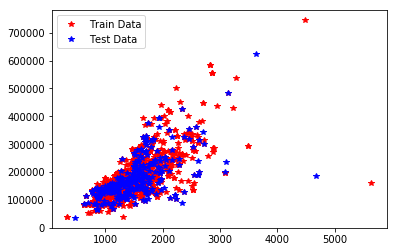

In [24]:
#Splitting the data into test and train data,in this case 80% is taken for training and 20% for testing.
test_perc=0.2
x_train,y_train,x_test,y_test = split_data(x,y,test_perc)
#Plotting the graph x_train,y_train,x_test,y_test
plt.figure(3)
plt.plot(x_train[:,3],y_train,'r*',label='Train data')
plt.plot(x_test[:,3],y_test,'b*',label='Test data')
plt.legend(('Train Data','Test Data'))
plt.show()

## Feature Scaling 
Scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

$->\begin{align}
   \frac{(x_i -\mu)}{\sigma}
   \end{align}
 $
    

In [25]:
print(np.shape(x_train))
print(np.shape(x_test))

(1160, 36)
(291, 36)


In [26]:
# r :- Number of X_train Examples
# c :- Number of features
r,c= np.shape(x_train)
scale_x=np.zeros((r,c))
mu=np.zeros((c,1))
sigma=np.zeros((c,1))
for j in range(c):
    mu[j]=np.mean(x_train[:,j])
    sigma[j]=np.std(x_train[:,j])
    scale_x[:,j]=(x_train[:,j]-mu[j])/sigma[j]
print(np.shape(scale_x))


(1160, 36)


In [27]:
m,n=np.shape(x_test)
scale_x_test=np.zeros((m,n))
for j in range(n):
    scale_x_test[:,j]=(x_test[:,j]-mu[j])/sigma[j]
print(np.shape(scale_x_test))

(291, 36)


### Adding ${x_0}$ bias in Dataset

In [28]:
scale_x=np.transpose(scale_x)
x0=np.ones((r,1))
x0=np.transpose(x0)
x_train=np.transpose(np.concatenate((x0,scale_x)))

In [29]:
r,c=np.shape(scale_x_test)
x_test=np.transpose(np.concatenate((np.ones((1,r)),np.transpose(scale_x_test))))

## Cost Function and Gradient Descent
<ul>
    <li>Dimension of y_train (1160,11)</li>
    <li>Dimension of theta (1160,1)</li>
    <li>Dimension of h (1160,1)</li>
 </ul>

In [30]:
#Initialize variables
r,c=np.shape((x_train))
theta=np.ones((c,1))*10
num_iters= 80000
alpha=1e-4

In [31]:
#Error between the hypothesis and actual y value.
def costfunction(x_train,y_train,theta):
    m=len(x_train)
    j=0
    h=np.matmul(x_train,theta)
    j=np.sum(((h-y_train)**2),axis=0)       
    return j/(2*m)

In [32]:
j1 = costfunction(x_train,y_train,theta)
print("Cost value is", j1)

Cost value is [1.98916202e+10]


In [33]:
#Gradient descent is used to calculate, the right values of theta by reducing the cost function.
def gradientDescent(x_train,y_train,theta,alpha,num_iters):
    J_history=[]
    l=0
    while l<num_iters:
        err=np.zeros((c,1))
        h=np.matmul(x_train,theta)
        err=np.sum(((h-y_train)*(x_train)),axis=0)
        err=np.transpose([err])
        cost=costfunction(x_train,y_train,theta)
        J_history.append(cost)
        theta=theta-alpha*(1/r)*err
        l=l+1
    return theta,J_history

In [34]:
thetas,J_history=gradientDescent(x_train,y_train,theta,alpha,num_iters)
print(J_history[-1])

[6.72721769e+08]


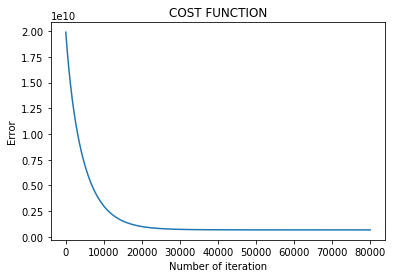

In [35]:
# Cost Function graph
plt.figure(6)
plt.plot(J_history)
plt.title("COST FUNCTION")
plt.xlabel('Number of iteration')
plt.ylabel('Error')
plt.show()

## $\hat Y$,Training Minimum Error(TME) & Accuracy
$
\hat Y = Number\;of\;Xtrain\;Examples * Updated\; \theta
$

$
TME = np.sum(np.abs(ytrain\;/\;max(ytrain)-\hat y\;/\;max \hat y)\;/\;len(\hat y))
$

$
Accuracy = (1-TME)*100
$

In [36]:
#Predicting y using the values of thetas obtained from gradient descent.
yhat=np.matmul((x_train),thetas)
train_err=np.sum(np.abs((y_train/max(y_train)-yhat/max(yhat))/len(yhat)))
accuracy=(1-train_err)*100
print("Training Mininum Error:{0},\nAccuracy:{1}".format(train_err,accuracy))

Training Mininum Error:0.06477700406279278,
Accuracy:93.52229959372073


In [38]:
#Predicting y for the new set of data that hasn't been used to train the algorithm.
yhat_test=np.matmul((x_test),thetas)
test_err=np.sum(np.abs((y_test/max(y_test)-yhat_test/max(yhat_test))/len(yhat_test)))
accuracy=(1-test_err)*100
print("Test Mininum Error:{0},\nAccuracy:{1}".format(test_err,accuracy))

Test Mininum Error:0.07038064922217899,
Accuracy:92.9619350777821


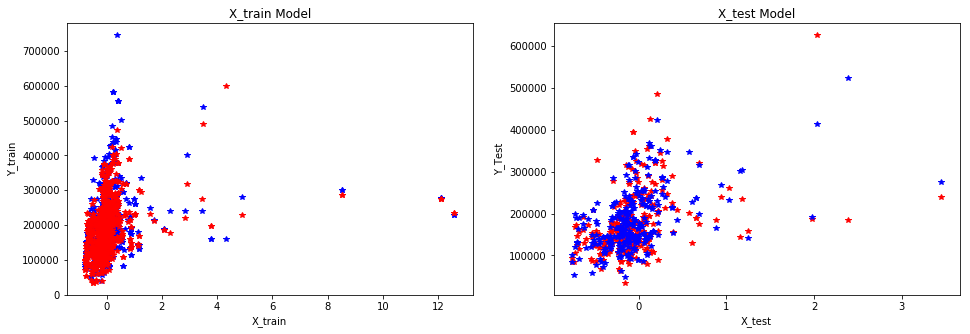

In [39]:
# linear Fit
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(16,5))
# Linear Fit Train Model
ax1.set_title("X_train Model")
ax1.set_xlabel('X_train')
ax1.set_ylabel('Y_train')
ax1.plot(x_train[:,2],y_train,'b*')
ax1.plot(x_train[:,2],yhat,'r*')
# Linear Fit Test Model
ax2.set_title("X_test Model")
ax2.set_xlabel('X_test')
ax2.set_ylabel('Y_Test')
ax2.plot(x_test[:,2],y_test,'r*')
ax2.plot(x_test[:,2],yhat_test,'b*')
plt.show()